In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dfbike = pd.read_csv("data/bike.csv")
dfcerv = pd.read_csv("data/cervical.csv")

## Bike dataset

- Count of bicycles including both casual and registered users. The count is used as the target in the regression task.
- The season, either spring, summer, fall or winter.
- Indicator whether the day was a holiday or not.
- The year, either 2011 or 2012.
- Number of days since the 01.01.2011 (the first day in the dataset). This feature was introduced to take account of the trend over time.
- Indicator whether the day was a working day or weekend.
- The weather situation on that day. One of: clear, few clouds, partly cloudy, cloudy, mist + clouds, mist + broken clouds, mist + few clouds, mist, light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds, heavy rain + ice pallets + thunderstorm + mist, snow + mist
- Temperature in degrees Celsius.
- Relative humidity in percent (0 to 100).
- Wind speed in km per hour.


In [3]:
dfbike.columns, dfcerv.columns

(Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'days_since_2011'],
       dtype='object'),
 Index(['Age', 'Number.of.sexual.partners', 'First.sexual.intercourse',
        'Num.of.pregnancies', 'Smokes', 'Smokes..years.',
        'Hormonal.Contraceptives', 'Hormonal.Contraceptives..years.', 'IUD',
        'IUD..years.', 'STDs', 'STDs..number.', 'STDs..Number.of.diagnosis',
        'STDs..Time.since.first.diagnosis', 'STDs..Time.since.last.diagnosis',
        'Biopsy'],
       dtype='object'))

In [5]:
dfbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0.0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1.0
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2.0
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3.0
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4.0


In [4]:
dfbike.dtypes

season              object
yr                   int64
mnth                object
holiday             object
weekday             object
workingday          object
weathersit          object
temp               float64
hum                float64
windspeed          float64
cnt                  int64
days_since_2011    float64
dtype: object

In [7]:
dfbike2 = dfbike.copy().drop('cnt', axis=1)
biketarget = dfbike.cnt
dfbike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0.0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1.0
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2.0
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3.0
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4.0


In [18]:
dfbike['season'].astype("category").cat.categories

Index(['FALL', 'SPRING', 'SUMMER', 'WINTER'], dtype='object')

In [19]:
def categorize(df, col, catdict):
    newcol = df[col].astype("category")
    catdict[col] = dict(enumerate(newcol.cat.categories))
    return newcol

In [20]:
bikecatcoldict = {}
dfbike2['season'] = categorize(dfbike, 'season', bikecatcoldict)
dfbike2['yr'] = categorize(dfbike, 'yr', bikecatcoldict)
dfbike2['mnth'] = categorize(dfbike, 'mnth', bikecatcoldict)
dfbike2['holiday'] = categorize(dfbike, 'holiday', bikecatcoldict)
dfbike2['weekday'] = categorize(dfbike, 'weekday', bikecatcoldict)
dfbike2['workingday'] = categorize(dfbike, 'workingday', bikecatcoldict)
dfbike2['weathersit'] = categorize(dfbike, 'weathersit', bikecatcoldict)

In [22]:
dfbike2.dtypes

season             category
yr                 category
mnth               category
holiday            category
weekday            category
workingday         category
weathersit         category
temp                float64
hum                 float64
windspeed           float64
days_since_2011     float64
dtype: object

In [23]:
dfbike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0.0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1.0
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2.0
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3.0
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4.0


In [25]:
def convert_to_codes(df, catcols):
    df2 = df.copy()
    for c in catcols:
        df2[c] = df[c].cat.codes
    return df2

In [26]:
dfbike3 = convert_to_codes(dfbike2, bikecatcoldict.keys())
dfbike3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011
0,1,0,4,1,2,0,1,8.175849,80.5833,10.749882,0.0
1,1,0,4,1,3,0,1,9.083466,69.6087,16.652113,1.0
2,1,0,4,1,1,1,0,1.229108,43.7273,16.636703,2.0
3,1,0,4,1,5,1,0,1.400000,59.0435,10.739832,3.0
4,1,0,4,1,6,1,0,2.666979,43.6957,12.522300,4.0


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [146]:
Xtrain_bike, Xtest_bike, ytrain_bike, ytest_bike = train_test_split(dfbike3, biketarget)

In [147]:
rfbike = RandomForestRegressor(n_estimators=200, max_features=3, min_samples_leaf =10, oob_score=True)
rfbike.fit(Xtrain_bike, ytrain_bike)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=200,
                      oob_score=True)

In [148]:
rfbike.score(Xtrain_bike, ytrain_bike), rfbike.oob_score_, rfbike.score(Xtest_bike, ytest_bike)

(0.869252587943343, 0.8285378433405577, 0.8512201493864531)

In [149]:
from sklearn.inspection import permutation_importance

In [150]:
def feature_importance(cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='features'>

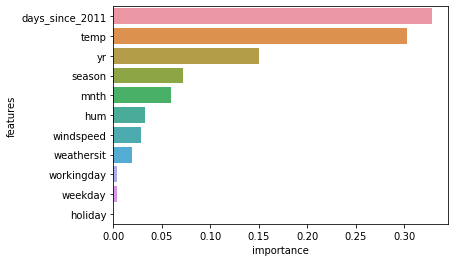

In [151]:
biketrainifi = feature_importance(dfbike3.columns, rfbike.feature_importances_)
sns.barplot(data=biketrainifi, y="features", x="importance")

<AxesSubplot:xlabel='importance', ylabel='features'>

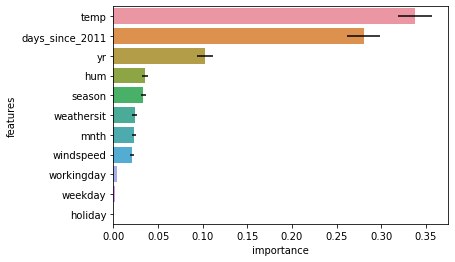

In [152]:
biketrainpfi = permutation_importance(rfbike, Xtrain_bike, ytrain_bike, n_repeats=30)
biketrainpfidf = feature_importance(dfbike3.columns, biketrainpfi['importances_mean'], biketrainpfi['importances_std'])
sns.barplot(data=biketrainpfidf, y="features", x="importance", xerr=biketrainpfidf.importance_std)

<AxesSubplot:xlabel='importance', ylabel='features'>

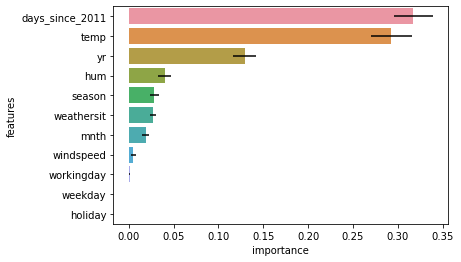

In [153]:
biketestpfi = permutation_importance(rfbike, Xtest_bike, ytest_bike, n_repeats=30)
biketestpfidf = feature_importance(dfbike3.columns, biketestpfi['importances_mean'], biketestpfi['importances_std'])
sns.barplot(data=biketestpfidf, y="features", x="importance", xerr=biketestpfidf.importance_std)

In [154]:
from sklearn.inspection import plot_partial_dependence

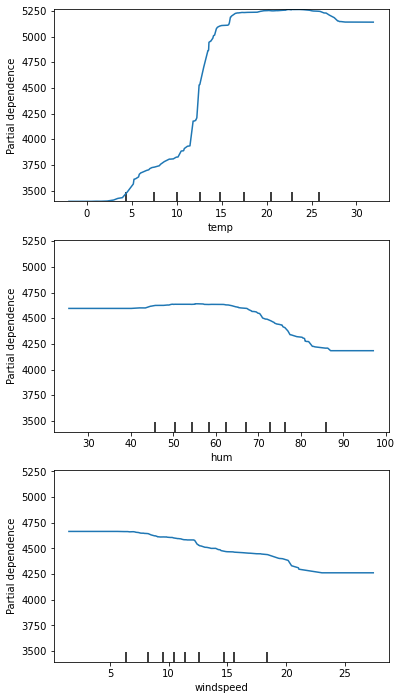

In [155]:
fig, axes = plt.subplots(3, 1, figsize = (6, 12))
plot_partial_dependence(rfbike, Xtest_bike, 
                        features=['temp', 'hum', 'windspeed'],
                        grid_resolution=200,
                        ax = axes)

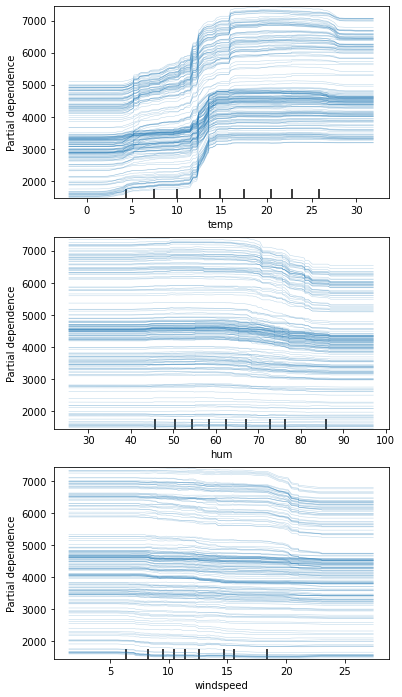

In [156]:
fig, axes = plt.subplots(3, 1, figsize = (6, 12))
plot_partial_dependence(rfbike, Xtest_bike, 
                        features=['temp', 'hum', 'windspeed'],
                        grid_resolution=200,
                        kind="individual",
                        ax = axes)

In [157]:
Xtest_bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011
200,0,0,5,1,6,1,0,28.111651,70.7083,7.625739,200.0
624,0,1,11,1,3,0,0,19.260000,57.0000,6.042281,624.0
504,2,1,8,1,2,0,0,20.200000,45.6250,5.626325,504.0
492,2,1,8,1,1,1,1,17.262500,66.4167,15.458307,492.0
211,0,0,5,1,3,0,0,29.874151,48.0833,11.042471,211.0
...,...,...,...,...,...,...,...,...,...,...,...
48,1,0,3,1,0,1,0,16.518349,51.6667,17.749975,48.0
244,0,0,11,1,0,1,1,22.236651,72.7083,9.375243,244.0
647,3,1,10,1,5,1,1,12.993349,76.1667,12.750100,647.0
165,2,0,6,1,6,1,0,21.453349,47.1667,11.250104,165.0


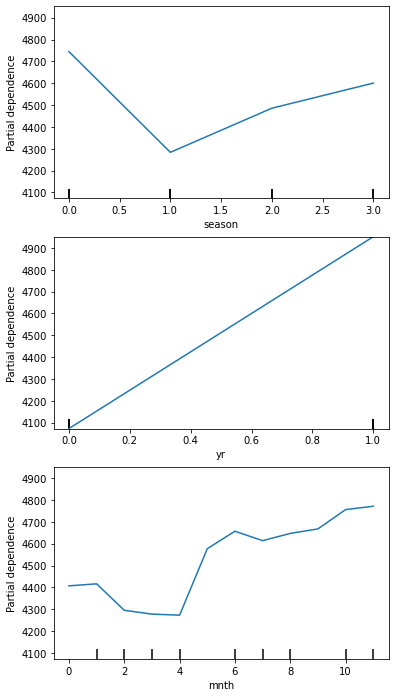

In [158]:
fig, axes = plt.subplots(3, 1, figsize = (6, 12))
plot_partial_dependence(rfbike, Xtest_bike, 
                        features=['season', 'yr', 'mnth'],
                        grid_resolution=200,
                        kind="average",
                        ax = axes)

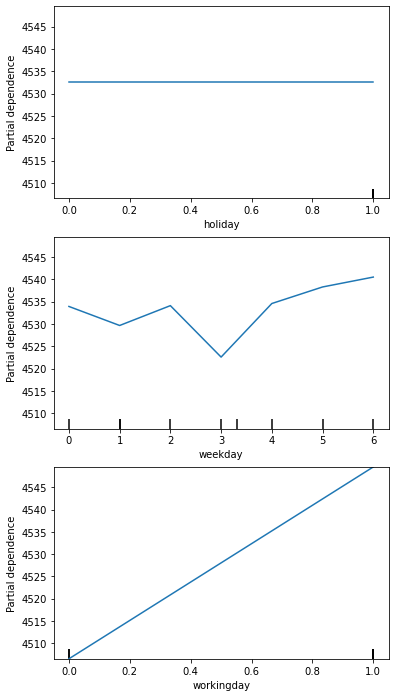

In [159]:
fig, axes = plt.subplots(3, 1, figsize = (6, 12))
plot_partial_dependence(rfbike, Xtest_bike, 
                        features=['holiday', 'weekday', 'workingday'],
                        grid_resolution=200,
                        kind="average",
                        ax = axes)

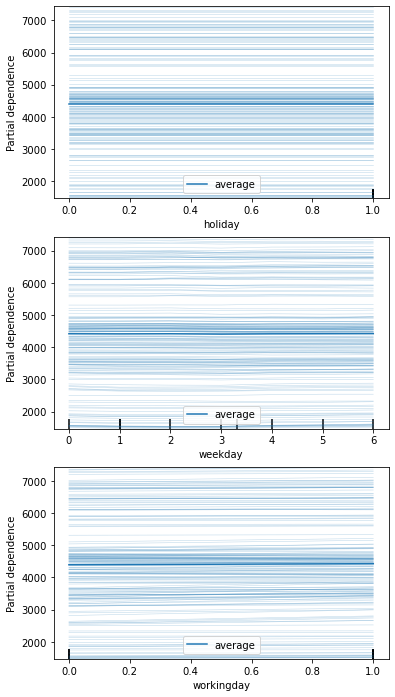

In [160]:
fig, axes = plt.subplots(3, 1, figsize = (6, 12))
plot_partial_dependence(rfbike, Xtest_bike, 
                        features=['holiday', 'weekday', 'workingday'],
                        grid_resolution=200,
                        kind="both",
                        ax = axes)

## Cervical Cancer Dataset

In [161]:
dfcerv.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
3,52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy


In [162]:
dfcerv2 = dfcerv.copy().drop('Biopsy', axis=1)
cervtarget = dfcerv.Biopsy=='Cancer'

Features in this dataset:

- Age in years
- Number of sexual partners
- First sexual intercourse (age in years)
- Number of pregnancies
- Smoking yes or no
- Smoking (in years)
- Hormonal contraceptives yes or no
- Hormonal contraceptives (in years)
- Intrauterine device yes or no (IUD)
- Number of years with an intrauterine device (IUD)
- Has patient ever had a sexually transmitted disease (STD) yes or no
- Number of STD diagnoses
- Time since first STD diagnosis
- Time since last STD diagnosis

The biopsy results "Healthy" or "Cancer". Target outcome.

In [163]:
dfcerv2.dtypes

Age                                   int64
Number.of.sexual.partners           float64
First.sexual.intercourse            float64
Num.of.pregnancies                  float64
Smokes                              float64
Smokes..years.                      float64
Hormonal.Contraceptives             float64
Hormonal.Contraceptives..years.     float64
IUD                                 float64
IUD..years.                         float64
STDs                                float64
STDs..number.                       float64
STDs..Number.of.diagnosis             int64
STDs..Time.since.first.diagnosis    float64
STDs..Time.since.last.diagnosis     float64
dtype: object

In [164]:
dfcerv3 = dfcerv2.copy()
dfcerv3['Smokes']=dfcerv2['Smokes'].astype('bool')
dfcerv3['Hormonal.Contraceptives'] = dfcerv3['Hormonal.Contraceptives']
dfcerv3['IUD']=dfcerv2['IUD'].astype('bool')
dfcerv3['STDs']=dfcerv2['STDs'].astype('bool')
dfcerv3.dtypes

Age                                   int64
Number.of.sexual.partners           float64
First.sexual.intercourse            float64
Num.of.pregnancies                  float64
Smokes                                 bool
Smokes..years.                      float64
Hormonal.Contraceptives             float64
Hormonal.Contraceptives..years.     float64
IUD                                    bool
IUD..years.                         float64
STDs                                   bool
STDs..number.                       float64
STDs..Number.of.diagnosis             int64
STDs..Time.since.first.diagnosis    float64
STDs..Time.since.last.diagnosis     float64
dtype: object

In [165]:
dfcerv3.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis
0,18,4.0,15.0,1.0,False,0.0,0.0,0.0,False,0.0,False,0.0,0,1.0,1.0
1,15,1.0,14.0,1.0,False,0.0,0.0,0.0,False,0.0,False,0.0,0,1.0,1.0
2,34,1.0,15.0,1.0,False,0.0,0.0,0.0,False,0.0,False,0.0,0,1.0,1.0
3,52,5.0,16.0,4.0,True,37.0,1.0,3.0,False,0.0,False,0.0,0,1.0,1.0
4,46,3.0,21.0,4.0,False,0.0,1.0,15.0,False,0.0,False,0.0,0,1.0,1.0


In [166]:
dfcerv3.shape

(858, 15)

In [306]:
Xtrain_cerv, Xtest_cerv, ytrain_cerv, ytest_cerv = train_test_split(dfcerv3, cervtarget, test_size=0.3, stratify=cervtarget)

In [307]:
np.mean(cervtarget), np.mean(ytrain_cerv), np.mean(ytest_cerv)

(0.0641025641025641, 0.06333333333333334, 0.06589147286821706)

In [319]:
from sklearn.utils import resample

In [323]:
cc = Xtrain_cerv[ytrain_cerv==True]
cn = Xtrain_cerv[ytrain_cerv==False]
Xtrain_cerv_upsampled = resample(cc, 
                                 replace=True,     # sample with replacement
                                 n_samples=cn.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
Xtrain_redone = pd.concat([cn, Xtrain_cerv_upsampled])
ytrain_redone = pd.concat([ytrain_cerv[ytrain_cerv==False], pd.Series([True]*cn.shape[0])])
Xtrain_redone.shape, ytrain_redone.shape, ytest_cerv.shape

((1124, 15), (1124,), (258,))

In [347]:
from sklearn.metrics import roc_auc_score
param_grid = {'min_samples_leaf': range(2, 10, 1),  'max_depth':[2,3,4], 'max_features':[4], 'n_estimators':[100, 200, 300, 400]}

In [348]:
rfcerv = RandomForestClassifier(class_weight="balanced") #max_features=3, min_samples_leaf =10,
gs = GridSearchCV(rfcerv, param_grid, cv=5, scoring="f1", return_train_score=True)
gs.fit(Xtrain_redone, ytrain_redone)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [4],
                         'min_samples_leaf': range(2, 10),
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='f1')

In [349]:
gs.best_params_

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 200}

In [350]:
rfcerv = gs.best_estimator_
rfcerv

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=4,
                       min_samples_leaf=3, n_estimators=200)

In [351]:
roc_auc_score(ytrain_cerv, rfcerv.predict_proba(Xtrain_cerv)[:,1]), roc_auc_score(ytest_cerv, rfcerv.predict_proba(Xtest_cerv)[:,1])

(0.9112895673347068, 0.7335855504027338)

<AxesSubplot:xlabel='importance', ylabel='features'>

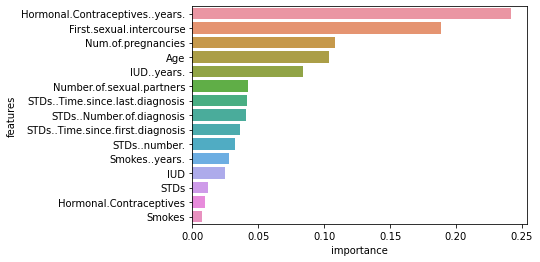

In [352]:
cervtrainifi = feature_importance(dfcerv3.columns, rfcerv.feature_importances_)
sns.barplot(data=cervtrainifi, y="features", x="importance")

<AxesSubplot:xlabel='importance', ylabel='features'>

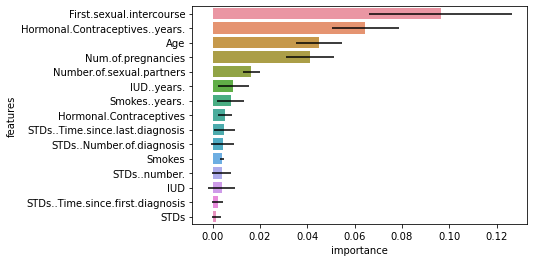

In [353]:
cervtrainpfi = permutation_importance(rfcerv, Xtrain_cerv, ytrain_cerv, n_repeats=30, scoring='roc_auc')
cervtrainpfidf = feature_importance(dfcerv3.columns, cervtrainpfi['importances_mean'], cervtrainpfi['importances_std'])
sns.barplot(data=cervtrainpfidf, y="features", x="importance", xerr=cervtrainpfidf.importance_std)

<AxesSubplot:xlabel='importance', ylabel='features'>

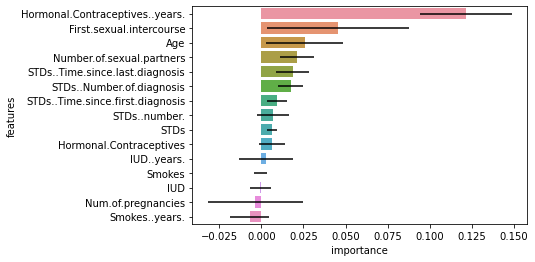

In [354]:
cervtestpfi = permutation_importance(rfcerv, Xtest_cerv, ytest_cerv, n_repeats=30, scoring='roc_auc')
cervtestpfidf = feature_importance(dfcerv3.columns, cervtestpfi['importances_mean'], cervtestpfi['importances_std'])
sns.barplot(data=cervtestpfidf, y="features", x="importance", xerr=cervtestpfidf.importance_std)

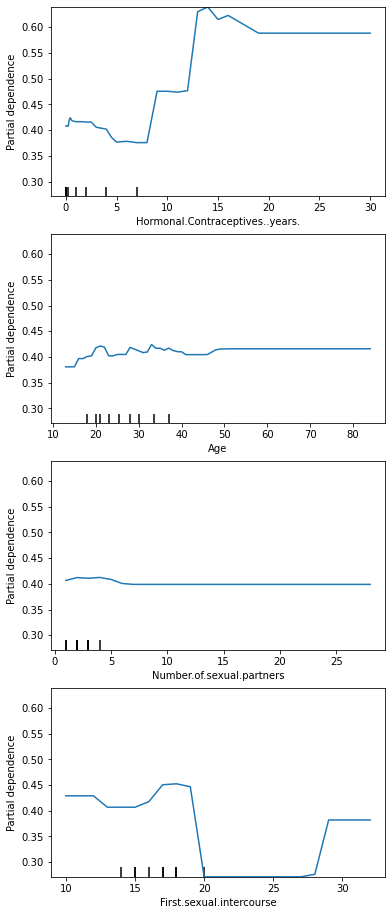

In [355]:
fig, axes = plt.subplots(4, 1, figsize = (6, 16))
plot_partial_dependence(rfcerv, Xtrain_cerv, 
                        features=['Hormonal.Contraceptives..years.', 'Age', 'Number.of.sexual.partners', 'First.sexual.intercourse'],
                        grid_resolution=200,
                        kind="average",
                        ax = axes)

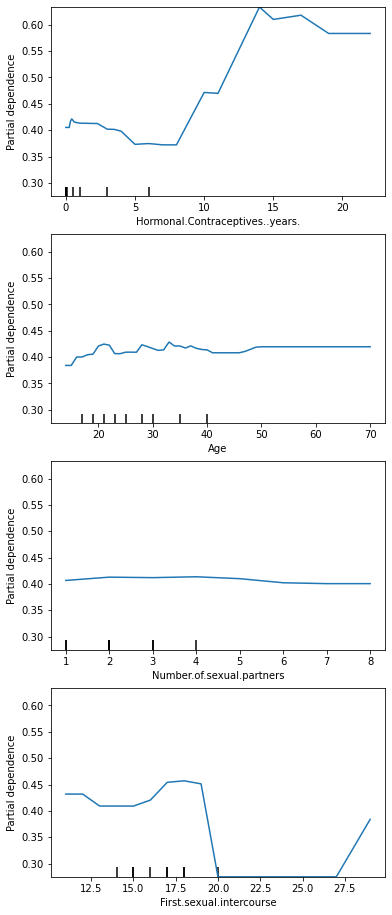

In [356]:
fig, axes = plt.subplots(4, 1, figsize = (6, 16))
plot_partial_dependence(rfcerv, Xtest_cerv, 
                        features=['Hormonal.Contraceptives..years.', 'Age', 'Number.of.sexual.partners', 'First.sexual.intercourse'],
                        grid_resolution=200,
                        kind="average",
                        ax = axes)

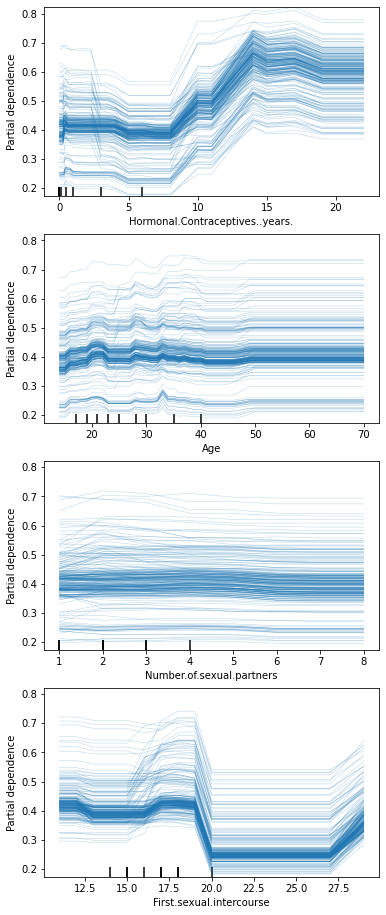

In [357]:
fig, axes = plt.subplots(4, 1, figsize = (6, 16))
plot_partial_dependence(rfcerv, Xtest_cerv, 
                        features=['Hormonal.Contraceptives..years.', 'Age', 'Number.of.sexual.partners', 'First.sexual.intercourse'],
                        grid_resolution=200,
                        kind="individual",
                        ax = axes)